In [62]:
import os

import timm
import torch
import numpy as np
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from timm.layers import SwiGLUPacked
from torchvision.datasets import PCAM
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from huggingface_hub import hf_hub_download

In [63]:
data_dir = os.path.join("..", "data")

dataset = PCAM(data_dir, split="train", download=True)
val_dataset = PCAM(data_dir, split="val", download=True)
test_dataset = PCAM(data_dir, split="test", download=True)

In [64]:
def download_weights(encoder: str):

    valid_encoders = [
        "uni",
        "gigapath",
        "virchow"
    ]

    assert encoder in valid_encoders, f"encoder must be one of {valid_encoders}"
    
    encoder_dir = os.path.join("..", "assets", "pre-trained-weights")
    os.makedirs(encoder_dir, exist_ok=True)

    if encoder == "uni":
        encoder_path = os.path.join(encoder_dir, "uni.pth")
        encoder = timm.create_model("hf-hub:MahmoodLab/uni", pretrained=True, init_values=1e-5, dynamic_img_size=True)

    if encoder == "gigapath":
        encoder_path = os.path.join(encoder_dir, "gigapath.pth")
        encoder = timm.create_model("hf_hub:prov-gigapath/prov-gigapath", pretrained=True, dynamic_img_size=True)

    if encoder == "virchow":
        encoder_path = os.path.join(encoder_dir, "virchow.pth")
        encoder = timm.create_model("hf-hub:paige-ai/Virchow", pretrained=True, mlp_layer=SwiGLUPacked, act_layer=torch.nn.SiLU)

    torch.save(encoder, encoder_path)


In [65]:
def get_encoder(encoder: str, device: str):
    valid_encoders = [
        "uni",
        "gigapath",
        "virchow"
    ]

    assert encoder in valid_encoders, f"encoder must be one of {valid_encoders}"
    encoder_dir = os.path.join("..", "assets", "pre-trained-weights")

    if encoder == "uni":
        encoder_path = os.path.join(encoder_dir, "uni.pth")
    
    if encoder == "gigapath":
        encoder_path = os.path.join(encoder_dir, "gigapath.pth")

    if encoder == "virchow":
        encoder_path = os.path.join(encoder_dir, "virchow.pth")

    if not os.path.isfile(encoder_path):
        download_weights(encoder)

    encoder = torch.load(encoder_path, map_location=torch.device(device))

    return encoder


In [66]:
load_dotenv(os.path.join("..", ".env"))

hf_token = os.getenv("HF_TOKEN")
cache_dir = os.path.join("..", "data")

download_weights("uni")
download_weights("gigapath")
# virchow = download_weights("virchow")

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/timm/models/_hub.py:190: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cached_file

In [67]:
encoder = get_encoder("gigapath", device="cpu")

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_19270/3104384759.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load(encoder_path, map_locat

In [68]:
brightness_range = np.linspace(0, 100, int(100/0.5))

brightness_range[:5]

array([0.        , 0.50251256, 1.00502513, 1.50753769, 2.01005025])

In [69]:
img, label = next(iter(dataset))

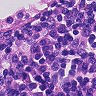

In [70]:
img

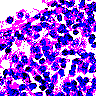

In [71]:
transformed = transforms.ColorJitter(
    contrast=(brightness_range[-1], brightness_range[-1])
    )(img)

transformed

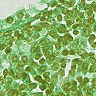

In [74]:
transformed = transforms.ColorJitter(hue=(0.5, 0.5))(img)

transformed

In [57]:
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = PCAM(data_dir, split="train", download=True, transform=transform)

train_loader = DataLoader(dataset, batch_size=10)

In [58]:
img, label = next(iter(train_loader))

In [59]:
img

tensor([[[[0.8863, 0.8784, 0.8745,  ..., 0.8549, 0.8392, 0.7373],
          [0.8745, 0.8706, 0.8667,  ..., 0.4980, 0.6235, 0.8000],
          [0.8706, 0.8667, 0.8588,  ..., 0.3020, 0.1647, 0.5373],
          ...,
          [0.4824, 0.5020, 0.4941,  ..., 0.7961, 0.8863, 0.7922],
          [0.3529, 0.3529, 0.3098,  ..., 0.8471, 0.7020, 0.8510],
          [0.3333, 0.3961, 0.3569,  ..., 0.7843, 0.8000, 0.7529]],

         [[0.8196, 0.8235, 0.8275,  ..., 0.6980, 0.7137, 0.6314],
          [0.8196, 0.8235, 0.8275,  ..., 0.3412, 0.4941, 0.6902],
          [0.8235, 0.8235, 0.8275,  ..., 0.1490, 0.0314, 0.4196],
          ...,
          [0.3176, 0.3529, 0.3569,  ..., 0.5294, 0.6078, 0.5098],
          [0.2039, 0.2196, 0.1765,  ..., 0.5961, 0.4431, 0.5961],
          [0.2000, 0.2667, 0.2314,  ..., 0.5333, 0.5569, 0.5098]],

         [[0.8824, 0.8824, 0.8745,  ..., 0.9020, 0.8667, 0.7529],
          [0.8784, 0.8784, 0.8706,  ..., 0.5882, 0.7098, 0.8824],
          [0.8784, 0.8784, 0.8706,  ..., 0

In [60]:
label

tensor([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])